# **HOMEWORK 1**
Build a classifier for fashion MNIST.

**1. Use exactly the same architectures (both densely connected layers and from convolutional layers) as the above MNIST** e.g., replace the dataset. Save the Jupyter Notebook in its original format and output a PDF file after training, testing, and validation. Make sure to write down how do they perform (training accuracny, testing accuracy).  


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from datetime import datetime

import torchvision
import torchvision.transforms as transforms

from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

from PIL import Image

In [5]:
github_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

fmnist_dataset = FashionMNIST(root = 'data/', download=True, train = True, transform = transforms.ToTensor())
print(fmnist_dataset)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 277kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.00MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 6.85MB/s]

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


torch.Size([1, 28, 28]) 0
tensor([[[0.6510, 0.5961, 0.6196, 0.6196, 0.6275],
         [0.6235, 0.6000, 0.6157, 0.6196, 0.6353],
         [0.6196, 0.6078, 0.6353, 0.6196, 0.6275],
         [0.5961, 0.6275, 0.6196, 0.6314, 0.6275],
         [0.5765, 0.6431, 0.6078, 0.6471, 0.6314]]])
tensor(1.) tensor(0.)


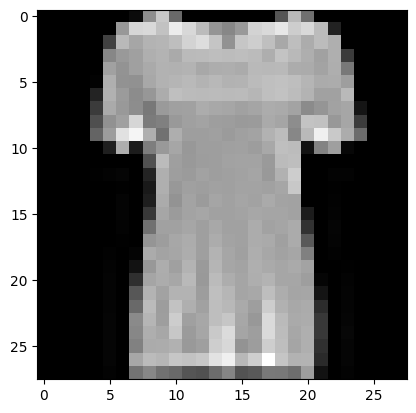

In [ ]:
# mnist_dataset has 'images as tensors' so that they can't be displayed directly
sampleTensor, label = fmnist_dataset[10]
print(sampleTensor.shape, label)
tpil = transforms.ToPILImage() # using the __call__ to
image = tpil(sampleTensor)
image.show()

# The image is now convert to a 28 X 28 tensor.
# The first dimension is used to keep track of the color channels.
# Since images in the MNIST dataset are grayscale, there's just one channel.
# The values range from 0 to 1, with 0 representing black, 1 white and the values between different shades of grey.
print(sampleTensor[:,10:15,10:15])
print(torch.max(sampleTensor), torch.min(sampleTensor))
plt.imshow(sampleTensor[0,:,:],cmap = 'gray')

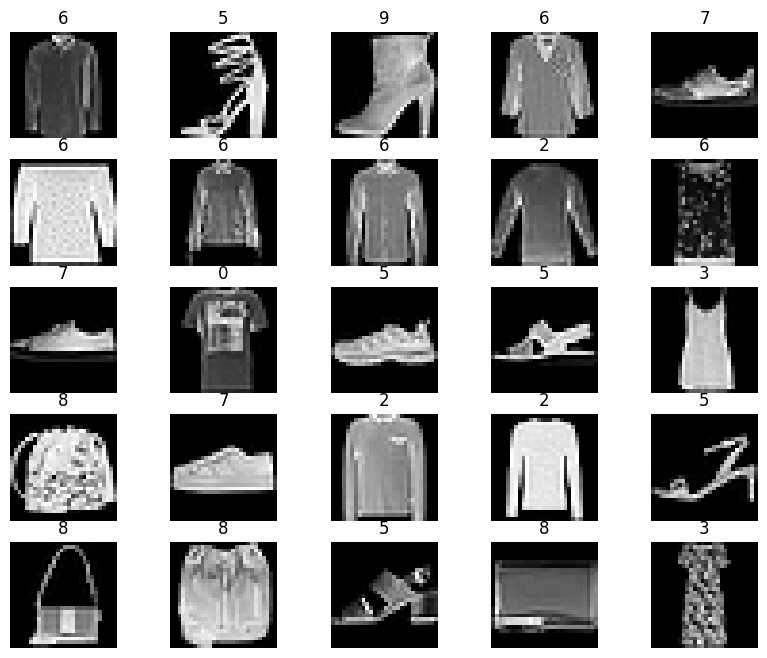

In [ ]:
# Print multiple images at once
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_dataset), size=(1,)).item()
    img, label = fmnist_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_data, validation_data = random_split(fmnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True) # true, bo tasujemy dla lepszego uczenia się
val_loader = DataLoader(validation_data, batch_size, shuffle = False) # fal

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [ ]:
train_data, validation_data = random_split(fmnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True) # true, bo tasujemy dla lepszego uczenia się
val_loader = DataLoader(validation_data, batch_size, shuffle = False) # fal

NameError: name 'random_split' is not defined

In [ ]:
## Basic set up for a logistic regression model (won't be used in practice or for training)
input_size = 28 * 28
num_classes = 10

# we gradually build on this inherited class from pytorch
model = nn.Linear(input_size, num_classes)

In [ ]:
class FMnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes) # defined above

    def forward(self, xb):
        # view xb with two dimensions, 28 * 28(i.e 784)
        # One argument to .reshape can be set to -1(in this case the first dimension),
        # to let PyTorch figure it out automatically based on the shape of the original tensor.
        xb = xb.reshape(-1, 784)
        print(f"xb: {xb}")
        out = self.linear(xb)
        print(f"out: {out}")
        return(out)

model = FMnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0157, -0.0185,  0.0246,  ..., -0.0158,  0.0079,  0.0313],
         [-0.0014, -0.0257, -0.0016,  ..., -0.0245, -0.0106, -0.0332],
         [ 0.0101,  0.0117, -0.0179,  ..., -0.0128, -0.0131, -0.0079],
         ...,
         [ 0.0327, -0.0190, -0.0112,  ..., -0.0145, -0.0113, -0.0017],
         [ 0.0332, -0.0333,  0.0212,  ..., -0.0096,  0.0221,  0.0043],
         [-0.0144, -0.0253, -0.0271,  ..., -0.0165, -0.0157,  0.0215]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0332,  0.0032, -0.0052,  0.0339,  0.0318, -0.0342,  0.0261, -0.0175,
         -0.0252, -0.0108], requires_grad=True)]

In [ ]:
# Alway check the dimensions and sample data/image
for images, labels in train_loader:
    outputs = model(images)
    break

print('Outputs shape: ', outputs.shape) # torch.Size([128, 10])
print('Sample outputs: \n', outputs[:2].data) # example outputs

xb: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
out: tensor([[ 0.6972, -0.4515,  0.6361,  ...,  0.7722, -0.5072, -0.4708],
        [ 0.3203, -0.1486,  0.1772,  ...,  0.4732, -0.3625,  0.1929],
        [ 0.3006, -0.2887,  0.4863,  ...,  0.3779, -0.3191, -0.6008],
        ...,
        [ 0.4071, -0.1328,  0.3121,  ...,  0.3470, -0.3891, -0.0010],
        [-0.0430, -0.4912,  0.9107,  ...,  0.6478,  0.0504, -0.1329],
        [ 0.3991, -0.0639,  0.2107,  ...,  0.6459, -0.4538, -0.0555]],
       grad_fn=<AddmmBackward0>)
Outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[ 0.6972, -0.4515,  0.6361, -0.2866,  0.1312,  0.4788,  0.2714,  0.7722,
         -0.5072, -0.4708],
        [ 0.3203, -0.1486,  0.1772, -0.4315,  0.0539,  0.0625,  0.2149,  0.4732,
         -0.3625,  0.192

In [ ]:
## Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# print(preds)
# print("\n")
# print(max_probs)

Sample probabilities:
 tensor([[0.1576, 0.0500, 0.1483, 0.0589, 0.0895, 0.1267, 0.1029, 0.1699, 0.0473,
         0.0490],
        [0.1257, 0.0787, 0.1090, 0.0593, 0.0963, 0.0972, 0.1132, 0.1465, 0.0635,
         0.1107]])


In [ ]:
# accuracy calculation
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ", accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.0781)


Loss Function:  <function cross_entropy at 0x7aa80bf623e0>


tensor(2.4221, grad_fn=<NllLossBackward0>)


In [ ]:
# We put all of the above:
class FMnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)

    # We add extra methods
    def training_step(self, batch):
        # when training, we compute the cross entropy, which help us update weights
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)

    def validation_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        # in validation, we want to also look at the accuracy
        # idealy, we would like to save the model when the accuracy is the highest.
        acc = accuracy(out, labels) ## calculate metrics/accuracy
        return({'val_loss':loss, 'val_acc': acc})

    def validation_epoch_end(self, outputs):
        # at the end of epoch (after running through all the batches)
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})

    def epoch_end(self, epoch,result):
        # log epoch, loss, metrics
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

# we instantiate the model
model = FMnistModel()

# a simple helper function to evaluate
def evaluate(model, data_loader):
    # for batch in data_loader, run validation_step
    outputs = [model.validation_step(batch) for batch in data_loader]
    return(model.validation_epoch_end(outputs))

# actually training
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        ## Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward() ## backpropagation starts at the loss and goes through all layers to model inputs
            optimizer.step() ## the optimizer iterate over all parameters (tensors); use their stored grad to update their values
            optimizer.zero_grad() ## reset gradients

        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [ ]:
# test the functions, with a randomly initialized model (weights are random, e.g., untrained)
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3799314498901367, 'val_acc': 0.03649129718542099}

In [ ]:
history1 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.7328, val_acc: 0.6026
Epoch [1], val_loss: 1.4335, val_acc: 0.6527
Epoch [2], val_loss: 1.2624, val_acc: 0.6625
Epoch [3], val_loss: 1.1522, val_acc: 0.6724
Epoch [4], val_loss: 1.0754, val_acc: 0.6790
Epoch [5], val_loss: 1.0184, val_acc: 0.6918
Epoch [6], val_loss: 0.9742, val_acc: 0.7000
Epoch [7], val_loss: 0.9386, val_acc: 0.7081
Epoch [8], val_loss: 0.9090, val_acc: 0.7192
Epoch [9], val_loss: 0.8842, val_acc: 0.7260


[{'val_loss': 2.3799314498901367, 'val_acc': 0.03649129718542099}]
[{'val_loss': 1.732800006866455, 'val_acc': 0.6025514006614685}, {'val_loss': 1.4335293769836426, 'val_acc': 0.6526898741722107}, {'val_loss': 1.262392282485962, 'val_acc': 0.6624802350997925}, {'val_loss': 1.152160406112671, 'val_acc': 0.6723694801330566}, {'val_loss': 1.075383186340332, 'val_acc': 0.6789952516555786}, {'val_loss': 1.0183509588241577, 'val_acc': 0.6917523741722107}, {'val_loss': 0.9741947054862976, 'val_acc': 0.699960470199585}, {'val_loss': 0.9385960102081299, 'val_acc': 0.7080696225166321}, {'val_loss': 0.9090110659599304, 'val_acc': 0.7192444801330566}, {'val_loss': 0.8842125535011292, 'val_acc': 0.725969135761261}]


Text(0.5, 1.0, 'Accuracy over epochs')

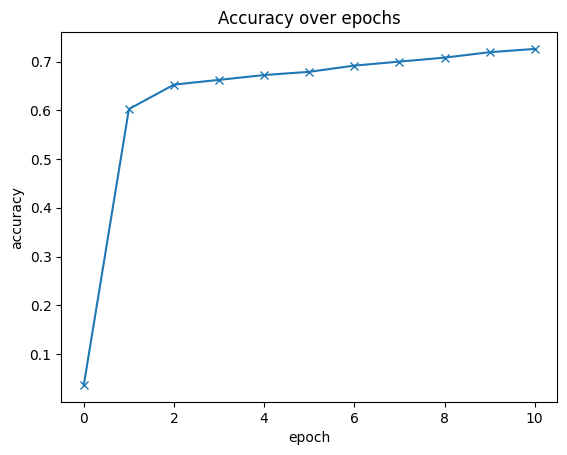

In [ ]:
# we combine the first result (no training) and the training results of 5 epoches
# plotting accuracy
print([result0])
print(history1)
history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy over epochs')

Text(0.5, 1.0, 'Losses  over epochs')

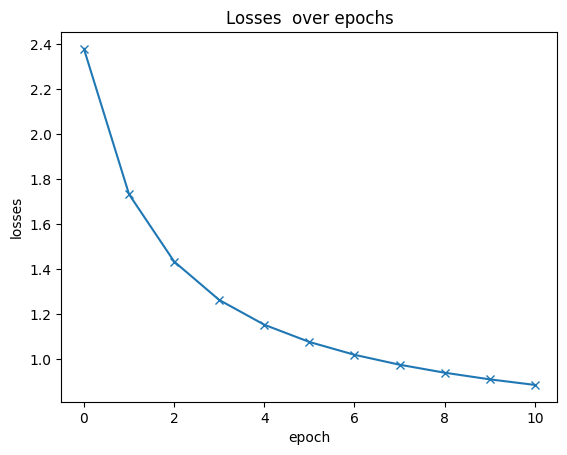

In [ ]:
# plotting losses
history = [result0] + history1
losses = [result['val_loss'] for result in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Losses  over epochs')

Length of Test Datasets:  10000
Shape:  torch.Size([1, 28, 28])
Label:  Ankle boot


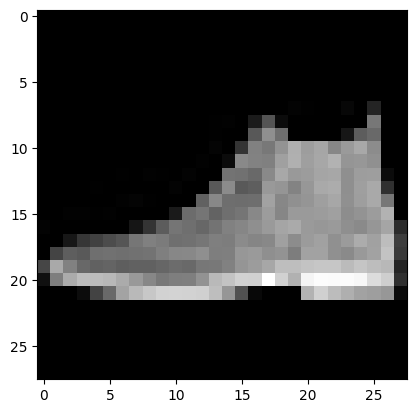

In [ ]:
# Testing with individual images
## Define the test dataset
test_dataset = FashionMNIST(root = 'data/', train = False, transform = transforms.ToTensor())
print("Length of Test Datasets: ", len(test_dataset))
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("Shape: ", img.shape)
print('Label: ', github_labels[label])

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

img, label = test_dataset[0]
print('Label:', github_labels[label], ', Predicted :', github_labels[predict_image(img, model)])

Label: Ankle boot , Predicted : Ankle boot


In [ ]:
# the final check on the test dataset (not used in any training)
test_loader = DataLoader(test_dataset, batch_size = 256, shuffle = False)
result = evaluate(model, test_loader)
result

NameError: name 'DataLoader' is not defined

# Convolutional Neural Network (CNN)


In [7]:
# We construct a fundamental CNN class.
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [8]:
loss_func = nn.CrossEntropyLoss()
loss_func

# unlike earlier example using optim.SGD, we use optim.Adam as the optimizer
# lr(Learning Rate): Rate at which our model updates the weights in the cells each time back-propagation is done.
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [9]:
from torch.autograd import Variable

def train(num_epochs, cnn, loaders):
    cnn.train()
    optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
    loss_func = nn.CrossEntropyLoss()
    # Train the model
    total_step = len(loaders)

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        pass
    pass

In [10]:
cnn = CNN()
# for testing purpose, we calculate the accuracy of the initial
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        pass
print('Accuracy of the model on the 10000 test images: %.2f' % accuracy)

Accuracy of the model on the 10000 test images: 0.06


In [11]:
train(num_epochs=5, cnn=cnn, loaders=train_loader)

Epoch [1/5], Step [100/391], Loss: 0.6037
Epoch [1/5], Step [200/391], Loss: 0.3797
Epoch [1/5], Step [300/391], Loss: 0.3051
Epoch [2/5], Step [100/391], Loss: 0.3629
Epoch [2/5], Step [200/391], Loss: 0.3543
Epoch [2/5], Step [300/391], Loss: 0.3756
Epoch [3/5], Step [100/391], Loss: 0.3022
Epoch [3/5], Step [200/391], Loss: 0.3422
Epoch [3/5], Step [300/391], Loss: 0.3307
Epoch [4/5], Step [100/391], Loss: 0.2324
Epoch [4/5], Step [200/391], Loss: 0.3186
Epoch [4/5], Step [300/391], Loss: 0.3038
Epoch [5/5], Step [100/391], Loss: 0.3361
Epoch [5/5], Step [200/391], Loss: 0.3318
Epoch [5/5], Step [300/391], Loss: 0.2481


In [ ]:
# Test the model, after the training
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        test_output, last_layer = cnn(images)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        pass
print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)

NameError: name 'cnn' is not defined

In [ ]:
sample = next(iter(test_loader))
imgs, lbls = sample

actual_number = lbls[:10].numpy()
actual_number

test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()


pred_labels = [github_labels[i] for i in pred_y]
actual_labels = [github_labels[i] for i in actual_number]

print(f'Prediction clothes: {pred_labels}')
print(f'Actual clothes: {actual_labels}')

Prediction shapes: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']
Actual shapes: ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [ ]:
from google.colab import files

files.download('stanowski_problem1.ipynb')

!jupyter nbconvert --to pdf stanowski_problem1.ipynb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook stanowski_problem1.ipynb to pdf
[NbConvertApp] Support files will be in stanowski_problem1_files/
[NbConvertApp] Making directory ./stanowski_problem1_files
[NbConvertApp] Writing 72570 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 174613 bytes to stanowski_problem1.pdf


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-extra texlive-latex-recommended texlive-pictures tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java 